In [1]:
%%time
import os
import time
import numpy
import pickle
import cProfile
import itertools
import matplotlib
matplotlib.use('Agg')
from sklearn import metrics 
from sklearn.svm import SVC
from sklearn.feature_selection import *
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_approximation import *
from sklearn.preprocessing import StandardScaler
from sklearn.learning_curve import learning_curve
from sklearn.model_selection import *
from sklearn.cross_validation import cross_val_score
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import mutual_info_classif

# %jsroot on9
%matplotlib inline

CPU times: user 1.21 s, sys: 363 ms, total: 1.57 s
Wall time: 2.42 s


/Users/fsiroky/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/fsiroky/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
# %%time
# tChain = rt.TChain('MyAnalysis/MyTree')
# tChain.Add("ntuples/*.root")
# array = root_numpy.tree2array(tChain)
# print 'Total number of entries: ',tChain.GetEntries()


# Function Definitions

In [3]:
#%%time
def outputs(array):
    goodEvents = array[array['lumi'] != 0]
    ind = numpy.lexsort((goodEvents['lumiId'],goodEvents['runId']))
    events = goodEvents[ind]
    dataset = numpy.empty([len(goodEvents),30])
    target = numpy.empty([len(goodEvents)])
    badOnes = numpy.array([])

    for j, event in enumerate(events):
        try:
            dataset[j,0:7] = event['qPFJetPt']
            dataset[j,7:14] = event['qPFJetEta']
            dataset[j,14:21] = event['qPFJetPhi']
            dataset[j,21:28] = event["qMetPt"]
            dataset[j,28:35] = event["qMetPhi"]
            dataset[j,35:42] = event['qNVtx']
            dataset[j,42] = event['crossSection']
            dataset[j,43] = event['lumi']
            target[j] = event['isSig']
        except ValueError:
            badOnes = numpy.append(badOnes,j)
            
    mask = numpy.zeros(len(dataset), dtype=bool)
    mask[badOnes.astype(int)] = True
    mask = ~mask
    dataset = dataset[mask]
    target = target[mask]
       
    return dataset, target


# Settings and Data Prep

In [4]:

inFile  = open('dataWithMet.pkl', 'rb')
dataset = pickle.load(inFile, encoding = "latin1")
inFile.close()

inFile = open('jetMetTarget.pkl', 'rb')
target = pickle.load(inFile, encoding = "latin1")
inFile.close()
print(len(dataset[0]))
print(target)

43
[ 1.  1.  1. ...,  1.  1.  1.]


# Plots results

In [5]:
dataset = dataset[:,:-1]
sigInd = numpy.where(target==1)
backInd = numpy.where(target==0)
sigVals = dataset[sigInd]
backVals = dataset[backInd]
sigTarget = target[sigInd]
backTarget = target[backInd]

43


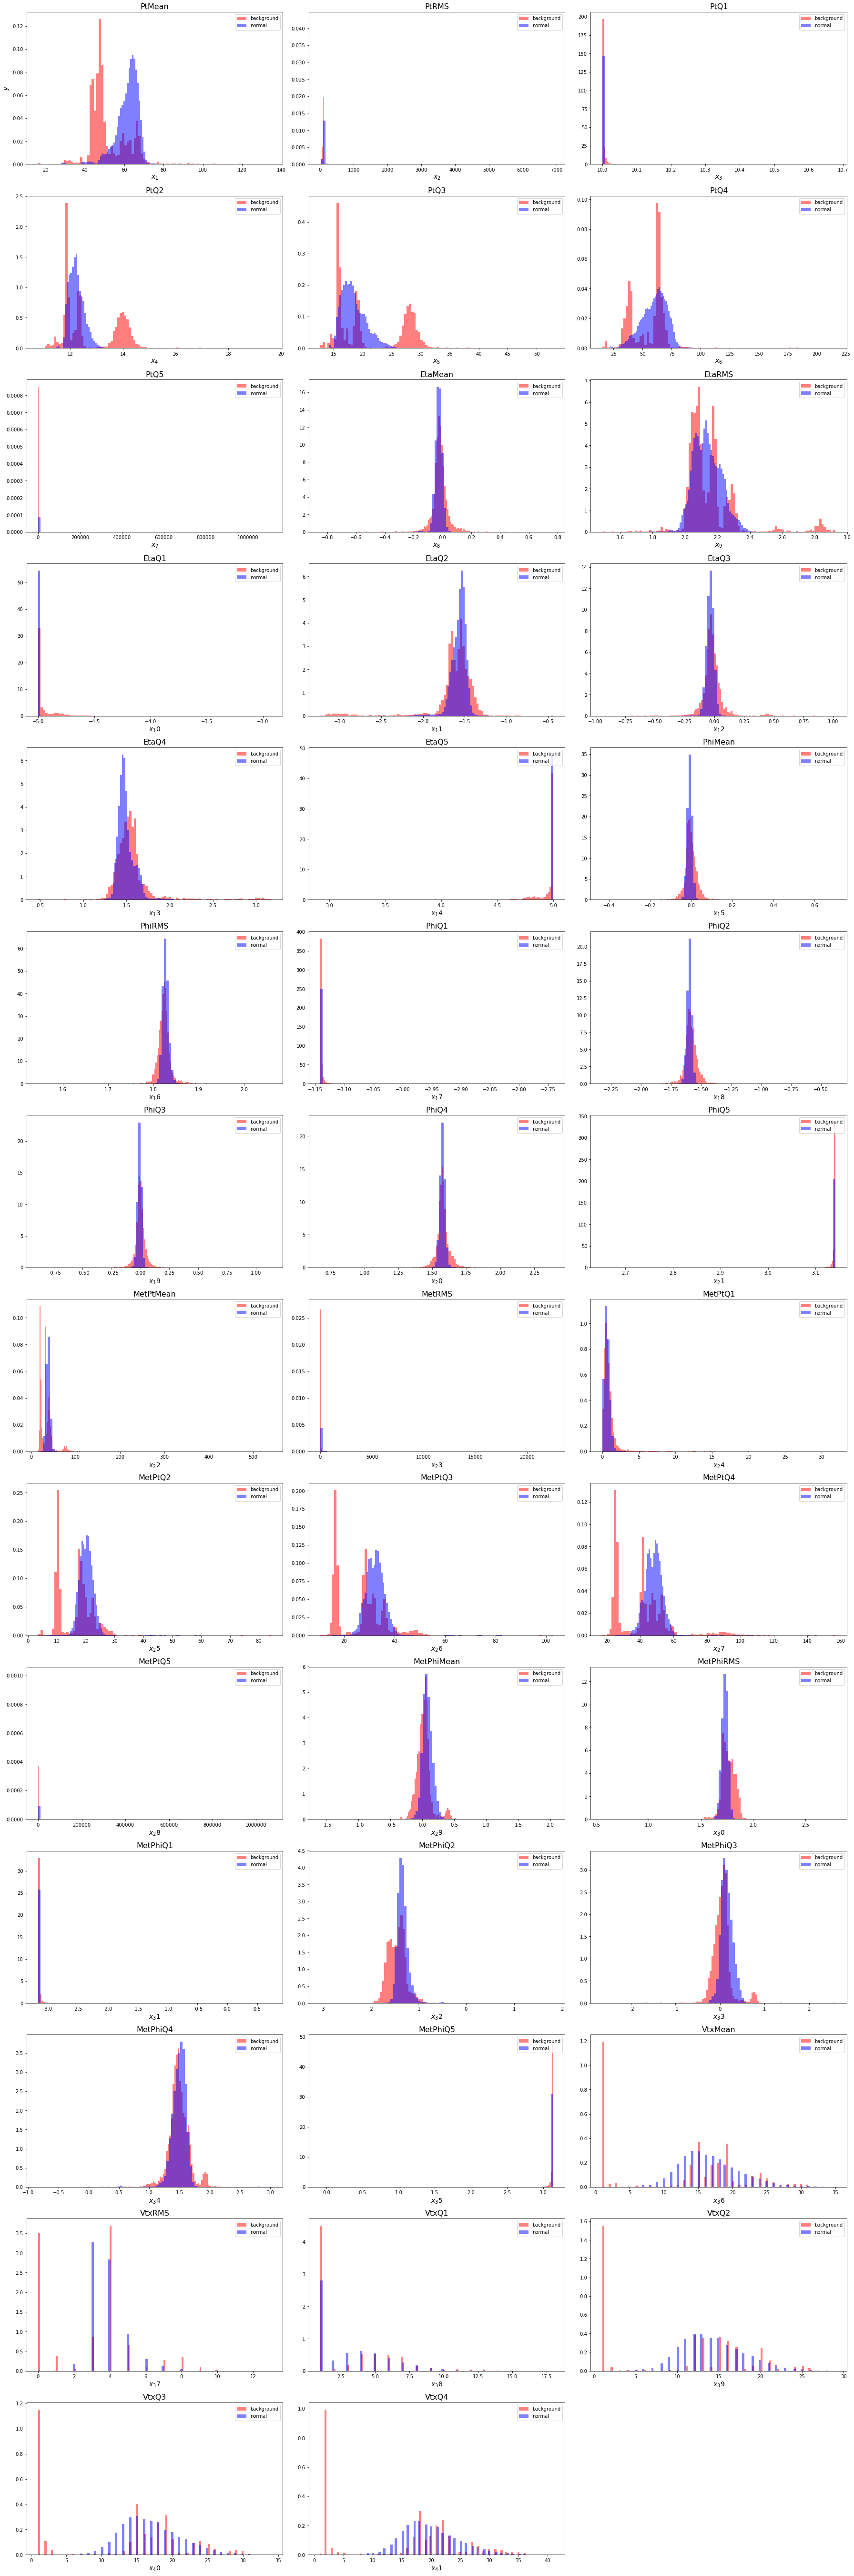

In [8]:
labels = ['PtMean','PtRMS','PtQ1','PtQ2','PtQ3','PtQ4','PtQ5',
           'EtaMean','EtaRMS','EtaQ1','EtaQ2','EtaQ3','EtaQ4','EtaQ5',
           'PhiMean','PhiRMS','PhiQ1','PhiQ2','PhiQ3','PhiQ4','PhiQ5',
            "MetPtMean", "MetRMS", "MetPtQ1",'MetPtQ2','MetPtQ3','MetPtQ4','MetPtQ5',
           'MetPhiMean','MetPhiRMS','MetPhiQ1','MetPhiQ2','MetPhiQ3','MetPhiQ4','MetPhiQ5',
           'VtxMean','VtxRMS','VtxQ1','VtxQ2','VtxQ3','VtxQ4','VtxQ5', 'crossSection']
print(len(labels))
fig = plt.figure(figsize=(25, 80))
for i in range(41):
    plt.subplot(15, 3, i + 1)  #number of rows, number of pictures per row, iterator
    plt.hist(backVals[:,i], 100, facecolor='red', alpha=0.5, label="background", normed = True)
    plt.hist(sigVals[:,i], 100, facecolor='blue', alpha=0.5, label="normal", normed = True)
    plt.legend(loc="upper right")
    
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title(labels[i],fontsize=16)
plt.tight_layout()
# plt.show()
# savefig('/afs/cern.ch/user/f/fsiroky/Desktop/Humza_analysis/foo.png')
#plt.savefig('/afs/cern.ch/user/f/fsiroky/Desktop/Humza_analysis/feature_plots.pdf', dpi=fig.dpi)
plt.show()